In [1]:
import os
import pandas as pd

data_dir = 'C:\\Users\\Cristina Jorge\\OneDrive\\Documentos\\GitHub\\Back-End-Elo\\data'
Brasileiro = pd.read_csv(os.path.join(data_dir, 'dataBRA.csv'))
Brasileiro23 = pd.read_csv(os.path.join(data_dir, 'serieA_2023_matches.csv'))

In [3]:
# Merge dataframes and sort by date
frames = [Brasileiro, Brasileiro23]
df = pd.concat(frames)
df = df.drop_duplicates()
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, errors='coerce')
df = df.sort_values(by='Data')
df

C:\Users\Cristina Jorge\AppData\Local\Temp\ipykernel_6460\1470201181.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, errors='coerce')


,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Série A,2003.0,2003-03-29,Guarani,4.0,2.0,Vasco,VC,3.0,0.0,2.0
1,Série A,2003.0,2003-03-29,Athletico-PR,2.0,0.0,Grêmio,VC,3.0,0.0,1.0
2,Série A,2003.0,2003-03-30,Cruzeiro,2.0,2.0,São Caetano,E,1.0,1.0,6.0
3,Série A,2003.0,2003-03-30,Internacional,1.0,1.0,Ponte Preta,E,1.0,1.0,9.0
4,Série A,2003.0,2003-03-30,Criciúma,2.0,0.0,Fluminense,VC,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
367,Série A,2023.0,2023-12-03,Athletico-PR,3.0,0.0,Santos,VC,3.0,0.0,369.0
362,Série A,2023.0,2023-12-03,Flamengo,2.0,1.0,Cuiabá,VC,3.0,0.0,364.0
361,Série A,2023.0,2023-12-03,Fortaleza,1.0,0.0,Goiás,VC,3.0,0.0,363.0
363,Série A,2023.0,2023-12-03,Botafogo,0.0,0.0,Cruzeiro,E,1.0,1.0,365.0


In [15]:
df.dtypes# Assuming df is your DataFrame and 'column_name' is the column you want to change
df['Temp'] = df['Temp'].astype(str)

In [16]:
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Série A,2003.0,2003-03-29,Guarani,4.0,2.0,Vasco,VC,3.0,0.0,2.0
1,Série A,2003.0,2003-03-29,Athletico-PR,2.0,0.0,Grêmio,VC,3.0,0.0,1.0
2,Série A,2003.0,2003-03-30,Cruzeiro,2.0,2.0,São Caetano,E,1.0,1.0,6.0
3,Série A,2003.0,2003-03-30,Internacional,1.0,1.0,Ponte Preta,E,1.0,1.0,9.0
4,Série A,2003.0,2003-03-30,Criciúma,2.0,0.0,Fluminense,VC,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
367,Série A,2023.0,2023-12-03,Athletico-PR,3.0,0.0,Santos,VC,3.0,0.0,369.0
362,Série A,2023.0,2023-12-03,Flamengo,2.0,1.0,Cuiabá,VC,3.0,0.0,364.0
361,Série A,2023.0,2023-12-03,Fortaleza,1.0,0.0,Goiás,VC,3.0,0.0,363.0
363,Série A,2023.0,2023-12-03,Botafogo,0.0,0.0,Cruzeiro,E,1.0,1.0,365.0


In [20]:
years_to_filter = ['2023.0', '2022.0', '2021.0']
filt = df['Temp'].isin(years_to_filter)
filtered_df = df[filt]

In [21]:
def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Games': 0, 'Victories': 0, 'Losses': 0, 'Draws': 0, 'Goals': 0})
        team_stats[home_team]['Games'] += 1
        team_stats[home_team]['Goals'] += row['GC']
        
        if result == 'VC':
            team_stats[home_team]['Victories'] += 1
        elif result == 'VV':
            team_stats[home_team]['Losses'] += 1
        else:
            team_stats[home_team]['Draws'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Games': 0, 'Victories': 0, 'Losses': 0, 'Draws': 0, 'Goals': 0})
        team_stats[away_team]['Games'] += 1
        team_stats[away_team]['Goals'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Losses'] += 1
        elif result == 'VV':
            team_stats[away_team]['Victories'] += 1
        else:
            team_stats[away_team]['Draws'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Team'})
    team_stats_df = team_stats_df.sort_values(by='Victories', ascending=False)
    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Victory Percentage'] = (team_stats_df['Victories'] / team_stats_df['Games']) * 100
    team_stats_df['Draw Percentage'] = (team_stats_df['Draws'] / team_stats_df['Games']) * 100
    team_stats_df['Loss Percentage'] = (team_stats_df['Losses'] / team_stats_df['Games']) * 100



    return team_stats_df

# Example usage:
team_stats_df = update_team_stats(df)
print(team_stats_df)



                   Team  Games  Victories  Losses  Draws  Goals  \
11            Palmeiras    113         63      23     27  187.0   
8           Atlético-MG    113         60      25     28  163.0   
10             Flamengo    113         58      30     25  185.0   
1            Fluminense    113         52      37     24  150.0   
16        Internacional    113         46      32     35  145.0   
9             Fortaleza    113         46      41     26  133.0   
6           Corinthians    113         44      32     37  129.0   
12         Athletico-PR    113         43      38     32  140.0   
19  Red Bull Bragantino    113         42      35     36  152.0   
0             São Paulo    112         37      34     41  124.0   
5                Santos    114         36      43     35  119.0   
13           América-MG    113         33      49     31  123.0   
2                Cuiabá    113         33      43     37  102.0   
15               Grêmio     75         32      31     12  104.

In [22]:
team_stats_df

,Team,Games,Victories,Losses,Draws,Goals,Victory Percentage,Draw Percentage,Loss Percentage
11,Palmeiras,113,63,23,27,187.0,55.752212,23.893805,20.353982
8,Atlético-MG,113,60,25,28,163.0,53.097345,24.778761,22.123894
10,Flamengo,113,58,30,25,185.0,51.327434,22.123894,26.548673
1,Fluminense,113,52,37,24,150.0,46.017699,21.238938,32.743363
16,Internacional,113,46,32,35,145.0,40.707965,30.973451,28.318584
9,Fortaleza,113,46,41,26,133.0,40.707965,23.008850,36.283186
6,Corinthians,113,44,32,37,129.0,38.938053,32.743363,28.318584
12,Athletico-PR,113,43,38,32,140.0,38.053097,28.318584,33.628319
19,Red Bull Bragantino,113,42,35,36,152.0,37.168142,31.858407,30.973451
0,São Paulo,112,37,34,41,124.0,33.035714,36.607143,30.357143


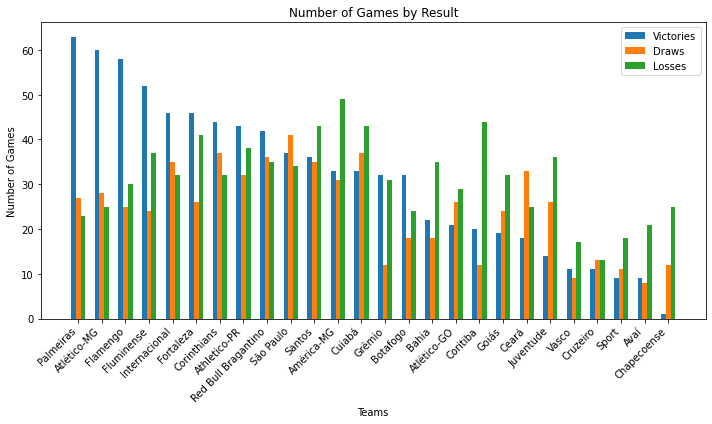

In [23]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Team']
victories = team_stats_df['Victories']
draws = team_stats_df['Draws']
losses = team_stats_df['Losses']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Victories')
bar2 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Draws')
bar3 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Losses')

# Adding labels, title, and legend
ax.set_xlabel('Teams')
ax.set_ylabel('Number of Games')
ax.set_title('Number of Games by Result')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


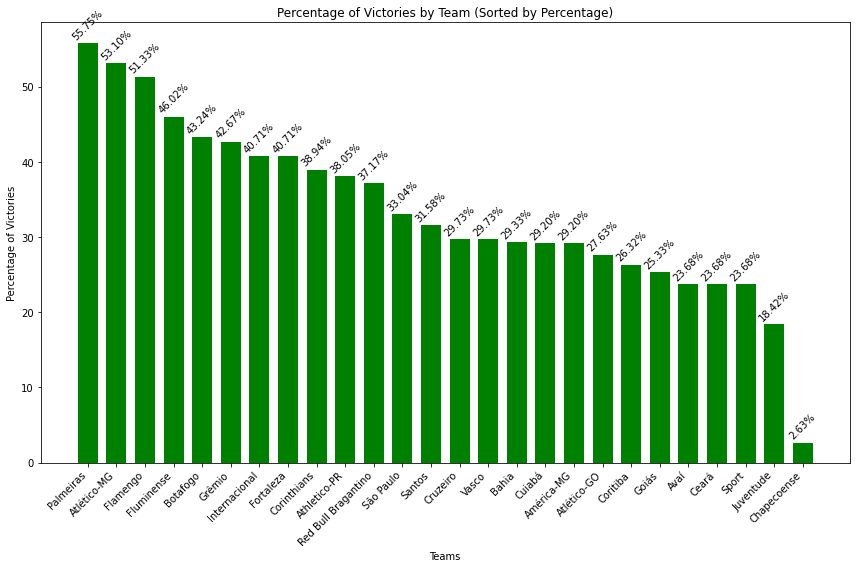

In [27]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Team']
victory_percentage = team_stats_df['Victory Percentage']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

bars = ax.bar(index, sorted_percentages, bar_width, color='green')

# Adding labels, title, and legend
ax.set_xlabel('Teams')
ax.set_ylabel('Percentage of Victories')
ax.set_title('Percentage of Victories by Team (Sorted by Percentage)')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
df.replace({'Esportiva': 'Esportiva (SP)'
             
            }, inplace=True)

df

df.to_csv("Data/campeonato_paulista_55_76.csv", index=False)


In [ ]:
filt = ((df['Fora'] == 'Esportiva (SP)'))
df[filt]